In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
mg_ml = pd.read_csv('mg_ml_rescaled.csv')

In [3]:
mg_ml = mg_ml.drop(columns=list(mg_ml.columns)[0], axis=1)

In [4]:
Y = mg_ml['default_status']
X = mg_ml.drop(columns=['default_status'], axis=1)

## Modeling 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Stratified split of the train and test set with train-test ratio of 7.5:2.5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, 
                                            stratify=Y, random_state=10)

In [6]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# See the inital model performance
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',probability=True))
clf.fit(X_train, Y_train)
print('Acc:', cross_val_score(clf, X_train, Y_train, 
                              cv=StratifiedKFold(n_splits=5), 
                              scoring='accuracy').mean())
print('F1:', cross_val_score(clf, X_train, Y_train, 
                             cv=StratifiedKFold(n_splits=5), 
                             scoring='f1').mean())
print('ROC AUC:', cross_val_score(clf, X_train, Y_train, 
                                  cv=StratifiedKFold(n_splits=5), 
                                  scoring='roc_auc').mean())

Acc: 0.7393333333333334
F1: 0.46792550166527747
ROC AUC: 0.7430014600658481


## Fine Tune using F1

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


# Assign different values for the hyperparameter
params = {
    'gamma': ['scale','auto'],
    'C':[0.001,.009,0.01,.09,1,5,10,25]
}
 
# Grid search with 5-fold cross-validation on F1-score
clf = GridSearchCV(SVC(random_state=10), param_grid=params, 
                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                scoring = ['accuracy','f1','roc_auc'],refit='f1')
clf.fit(X_train, Y_train)

print(clf.best_params_)

In [ ]:
clf = SVC(**clf.best_params_)
clf.fit(X_train,Y_train)
#SVC(C=1,gamma='auto',probability=True)

## Train Set Performance

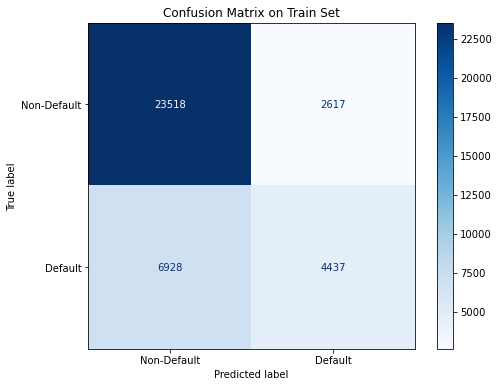

In [7]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(clf, X_train, Y_train, display_labels=['Non-Default', 'Default'], 
                      cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix on Train Set')
plt.show()

In [8]:
Y_train_pred = clf.predict(X_train)
Y_train_proba = clf.predict_proba(X_train)

print('Train Acc:', accuracy_score(Y_train, Y_train_pred))
print('Train F1:', f1_score(Y_train, Y_train_pred))
print('Train ROC AUC:', roc_auc_score(Y_train, Y_train_proba[:, 1]))

Train Acc: 0.7454666666666667
Train F1: 0.4817851131983279
Train ROC AUC: 0.7653399692668217


## Test Set Performance

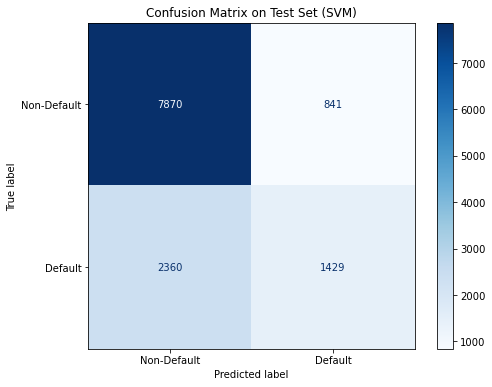

In [12]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(clf, X_test, Y_test, display_labels=['Non-Default', 'Default'], 
                      cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix on Test Set (SVM)')
plt.show()

In [10]:
# Predict on the test set
Y_test_pred = clf.predict(X_test)
Y_test_proba = clf.predict_proba(X_test)

print('test Acc:', accuracy_score(Y_test, Y_test_pred))
print('test F1:', f1_score(Y_test, Y_test_pred))
print('test ROC AUC:', roc_auc_score(Y_test, Y_test_proba[:, 1]))

test Acc: 0.74392
test F1: 0.4716949991747813
test ROC AUC: 0.7492390999824607


## ROC AUC

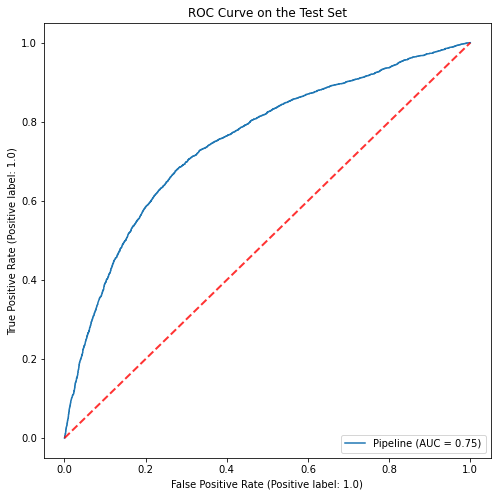

In [11]:
# ROC curve
fig, ax = plt.subplots(figsize=(8, 8))
plot_roc_curve(clf, X_test, Y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
ax.set_title('ROC Curve on the Test Set')
plt.show()